In [1]:
import db
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/u/70/viitala1/unix/miniconda3/envs/donkey/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
conn, c = db.get_connection("data.db")

In [6]:
sql = """
SELECT * FROM sessions WHERE description = "Success"
"""

sessions = pd.read_sql(sql, conn)
sessions

,id,time,description,model_name
0,200,2020-01-06T12:10:54.217691,Success,None
1,201,2020-01-06T13:40:07.113322,Success,None
2,202,2020-01-06T14:01:30.088454,Success,None
3,203,2020-01-06T14:34:43.977977,Success,None
4,204,2020-01-06T15:07:02.282239,Success,None
5,205,2020-01-06T15:36:07.786186,Success,None
6,206,2020-01-06T16:08:17.193380,Success,None
7,207,2020-01-06T16:42:00.395974,Success,None
8,208,2020-01-06T17:13:06.091548,Success,None
9,209,2020-01-06T17:37:16.806794,Success,None


In [8]:
sql = "SELECT * FROM episodes"

episodes = pd.read_sql(sql, conn)
episodes

,session,episode,time,steps,reward
0,100,1,2020-01-06T12:02:32.673601,91,73.111429
1,100,2,2020-01-06T12:02:57.680035,158,120.280714
2,100,3,2020-01-06T12:03:23.276046,164,132.900714
3,100,4,2020-01-06T12:03:42.025789,95,68.629000
4,100,5,2020-01-06T12:04:02.242672,110,90.896714
...,...,...,...,...,...
3948,304,30,2020-01-07T09:01:20.565053,91,66.363857
3949,304,31,2020-01-07T09:01:41.855824,152,124.281571
3950,304,32,2020-01-07T09:01:58.112041,102,86.876714
3951,304,33,2020-01-07T09:02:15.799265,116,97.939000


In [20]:
params = pd.read_sql("SELECT * FROM params W", conn)

In [15]:
succ = sessions.merge(episodes, left_on="id", right_on="session")

In [23]:
def get_params(session, conn):
    sql = """
            SELECT * 
            FROM params 
            WHERE 
            session = {} 
            AND name IN ('random_episodes', 'gamma', 'tau', 'lr', 'hidden_size', 'batch_size', 'target_entropy')""".format(session)
    
    return pd.read_sql(sql, conn)

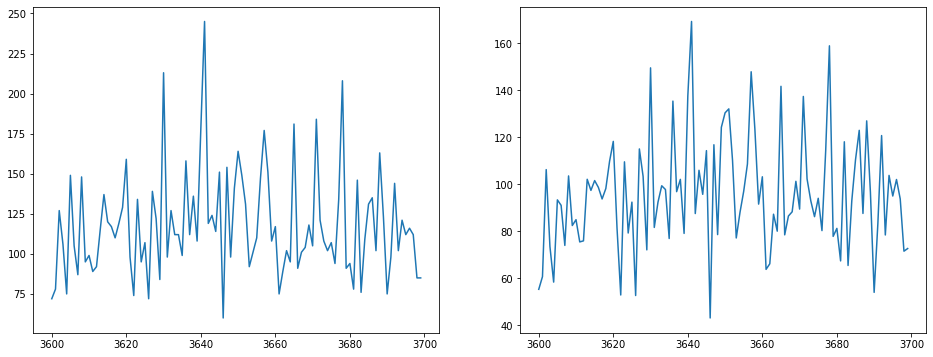

   session             name     value
0      301  random_episodes   10.0000
1      301            gamma    0.9500
2      301              tau    0.0100
3      301               lr    0.0001
4      301      hidden_size   64.0000
5      301       batch_size  128.0000
6      301   target_entropy   -2.0000


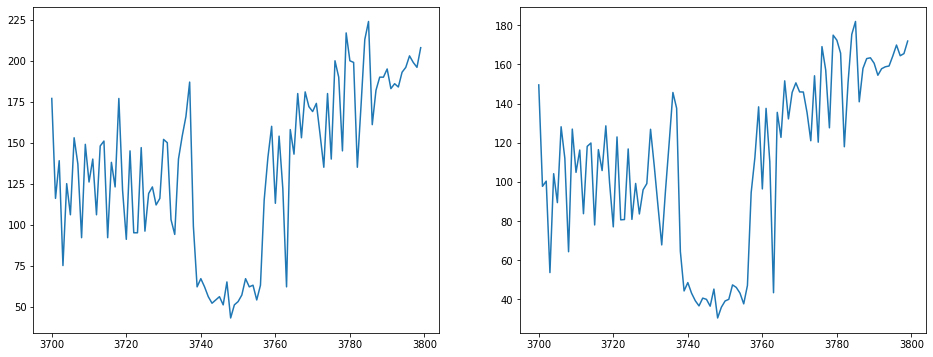

   session             name    value
0      302  random_episodes   10.000
1      302            gamma    0.950
2      302              tau    0.001
3      302               lr    0.001
4      302      hidden_size  128.000
5      302       batch_size  128.000
6      302   target_entropy   -1.000


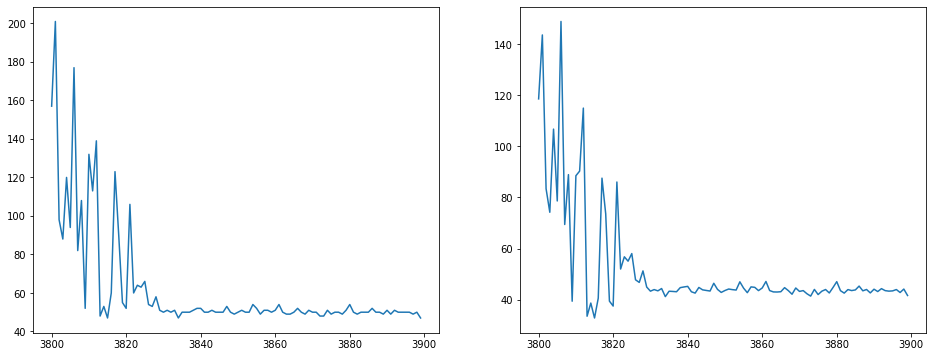

   session             name    value
0      303  random_episodes   10.000
1      303            gamma    0.950
2      303              tau    0.001
3      303               lr    0.010
4      303      hidden_size  128.000
5      303       batch_size  128.000
6      303   target_entropy   -2.000


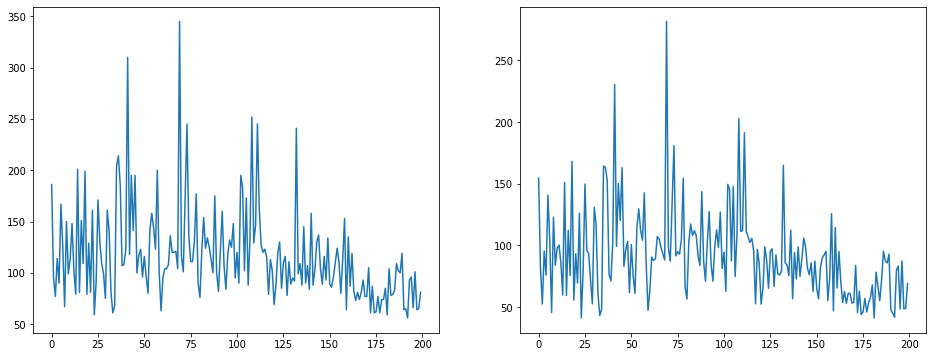

   session             name     value
0      200  random_episodes    5.0000
1      200            gamma    0.9900
2      200              tau    0.0010
3      200               lr    0.0001
4      200      hidden_size  128.0000
5      200       batch_size  128.0000
6      200   target_entropy   -1.0000


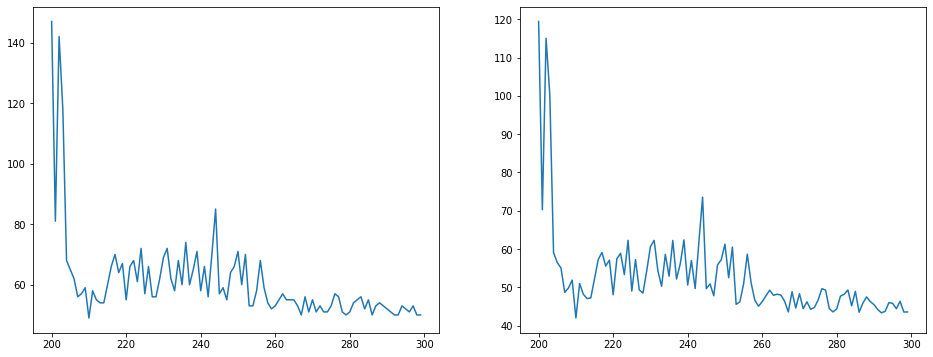

   session             name    value
0      201  random_episodes    5.000
1      201            gamma    0.990
2      201              tau    0.005
3      201               lr    0.010
4      201      hidden_size  256.000
5      201       batch_size  128.000
6      201   target_entropy   -2.000


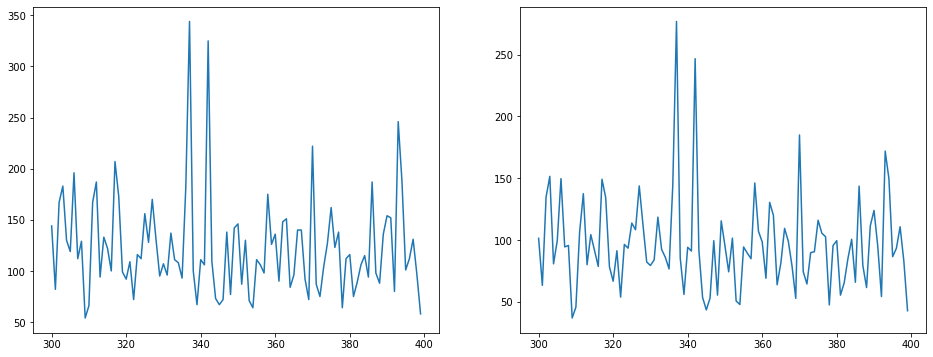

   session             name     value
0      202  random_episodes   10.0000
1      202            gamma    0.9500
2      202              tau    0.0010
3      202               lr    0.0001
4      202      hidden_size   64.0000
5      202       batch_size  128.0000
6      202   target_entropy   -6.0000


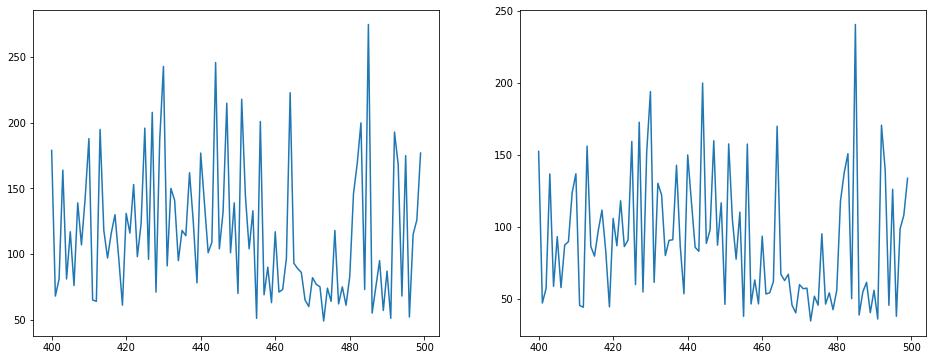

   session             name     value
0      203  random_episodes    5.0000
1      203            gamma    0.9900
2      203              tau    0.0050
3      203               lr    0.0001
4      203      hidden_size  256.0000
5      203       batch_size  128.0000
6      203   target_entropy   -1.0000


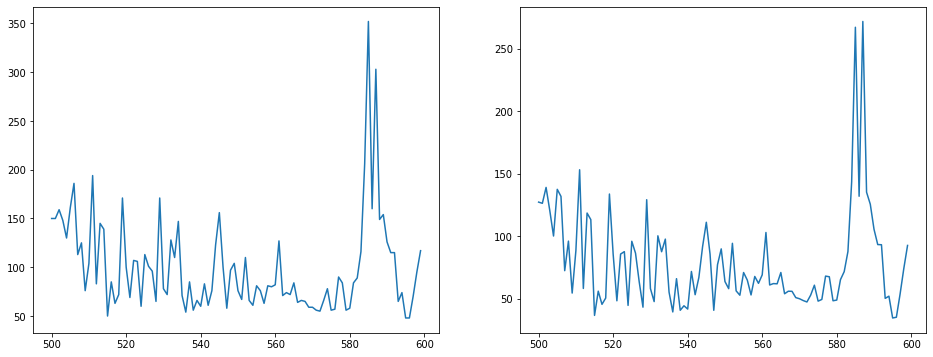

   session             name    value
0      204  random_episodes    5.000
1      204            gamma    0.950
2      204              tau    0.010
3      204               lr    0.001
4      204      hidden_size   64.000
5      204       batch_size  128.000
6      204   target_entropy   -1.000


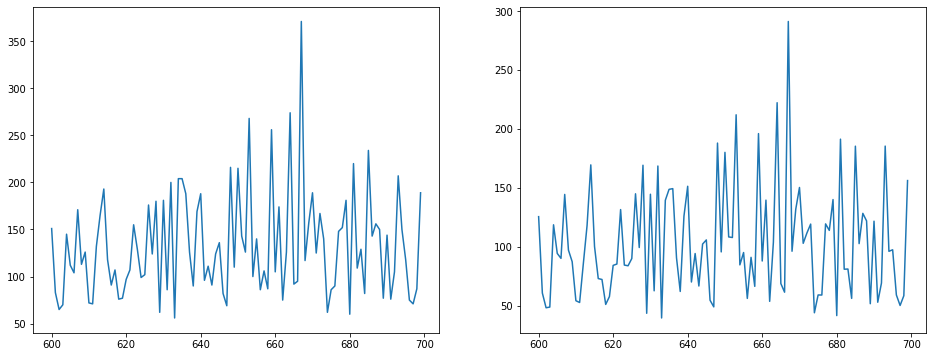

   session             name    value
0      205  random_episodes   5.0000
1      205            gamma   0.9500
2      205              tau   0.0050
3      205               lr   0.0001
4      205      hidden_size  64.0000
5      205       batch_size  64.0000
6      205   target_entropy  -2.0000


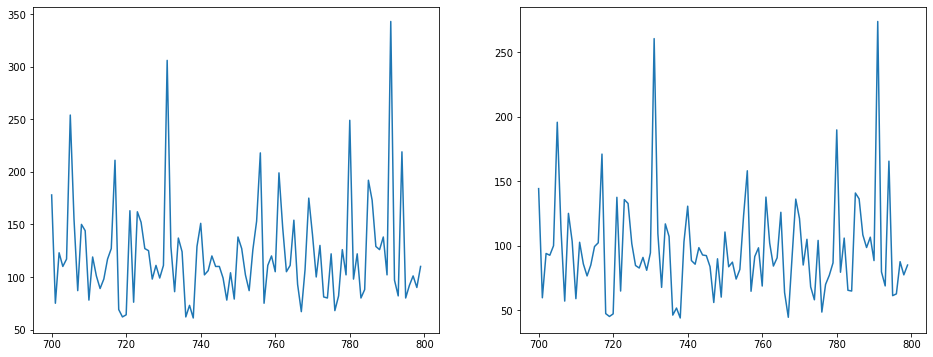

   session             name     value
0      206  random_episodes    5.0000
1      206            gamma    0.9900
2      206              tau    0.0010
3      206               lr    0.0001
4      206      hidden_size   64.0000
5      206       batch_size  128.0000
6      206   target_entropy   -1.0000


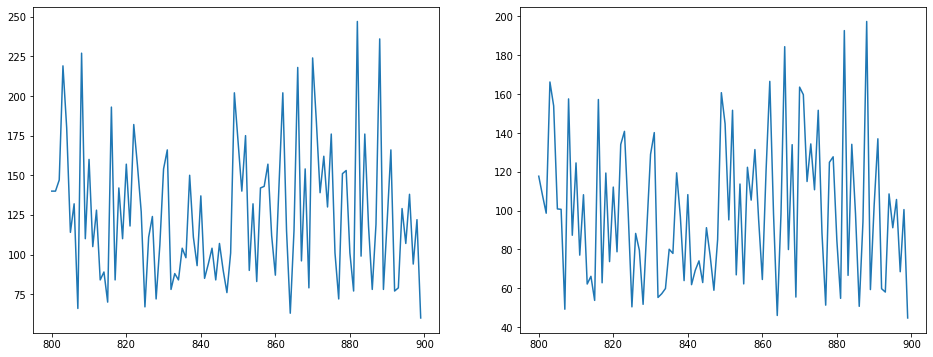

   session             name     value
0      207  random_episodes    5.0000
1      207            gamma    0.9500
2      207              tau    0.0100
3      207               lr    0.0001
4      207      hidden_size  256.0000
5      207       batch_size   64.0000
6      207   target_entropy   -6.0000


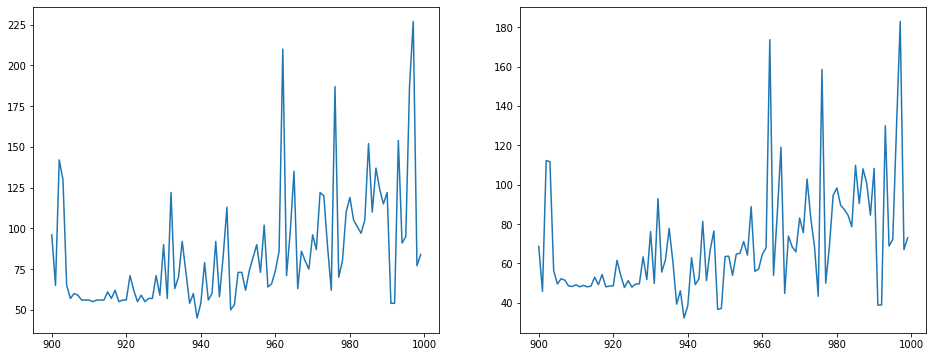

   session             name   value
0      208  random_episodes    5.00
1      208            gamma    0.95
2      208              tau    0.01
3      208               lr    0.01
4      208      hidden_size  128.00
5      208       batch_size   64.00
6      208   target_entropy   -6.00


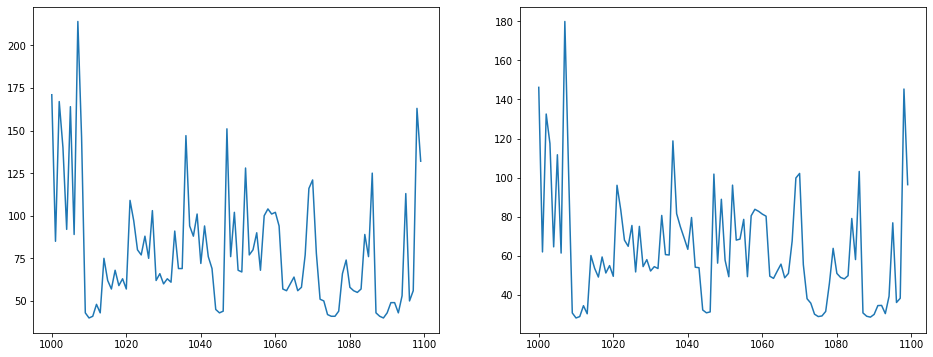

   session             name  value
0      209  random_episodes  10.00
1      209            gamma   0.99
2      209              tau   0.01
3      209               lr   0.01
4      209      hidden_size  64.00
5      209       batch_size  64.00
6      209   target_entropy  -6.00


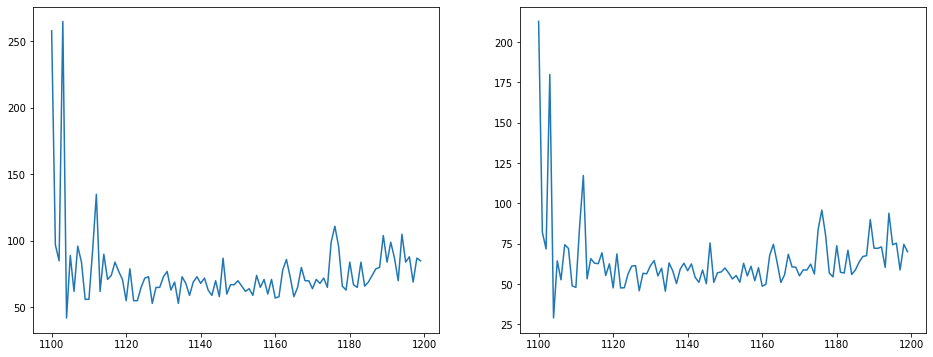

   session             name   value
0      210  random_episodes    5.00
1      210            gamma    0.99
2      210              tau    0.01
3      210               lr    0.01
4      210      hidden_size   64.00
5      210       batch_size  128.00
6      210   target_entropy   -2.00


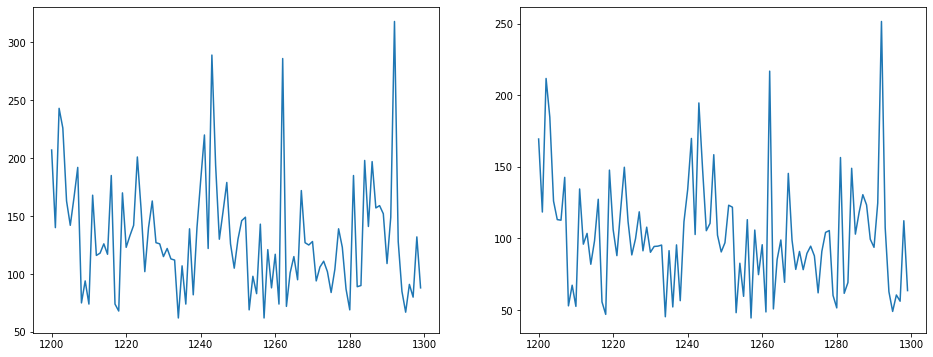

   session             name     value
0      211  random_episodes   10.0000
1      211            gamma    0.9900
2      211              tau    0.0010
3      211               lr    0.0001
4      211      hidden_size  256.0000
5      211       batch_size   64.0000
6      211   target_entropy   -6.0000


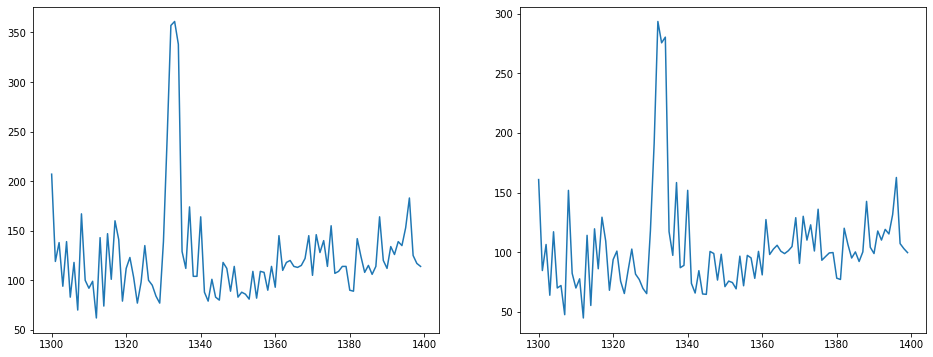

   session             name    value
0      212  random_episodes   10.000
1      212            gamma    0.950
2      212              tau    0.010
3      212               lr    0.001
4      212      hidden_size   64.000
5      212       batch_size  128.000
6      212   target_entropy   -1.000


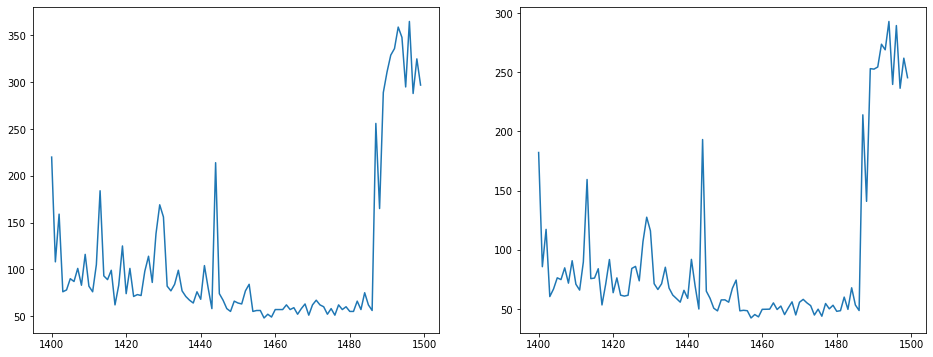

   session             name    value
0      213  random_episodes    5.000
1      213            gamma    0.950
2      213              tau    0.010
3      213               lr    0.001
4      213      hidden_size  128.000
5      213       batch_size  128.000
6      213   target_entropy   -1.000


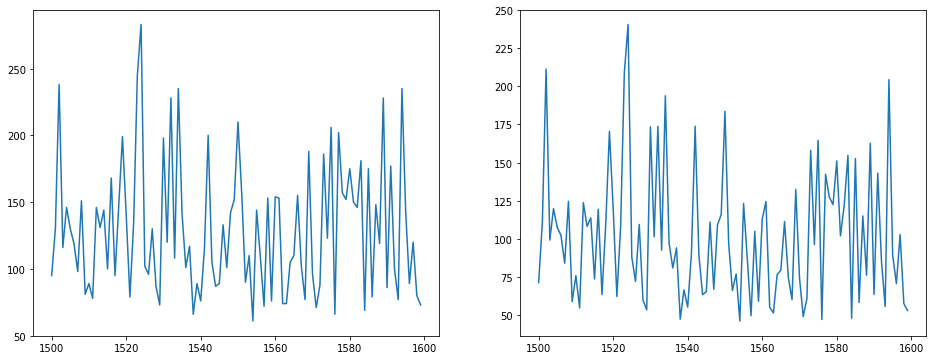

   session             name    value
0      214  random_episodes   5.0000
1      214            gamma   0.9900
2      214              tau   0.0050
3      214               lr   0.0001
4      214      hidden_size  64.0000
5      214       batch_size  64.0000
6      214   target_entropy  -2.0000


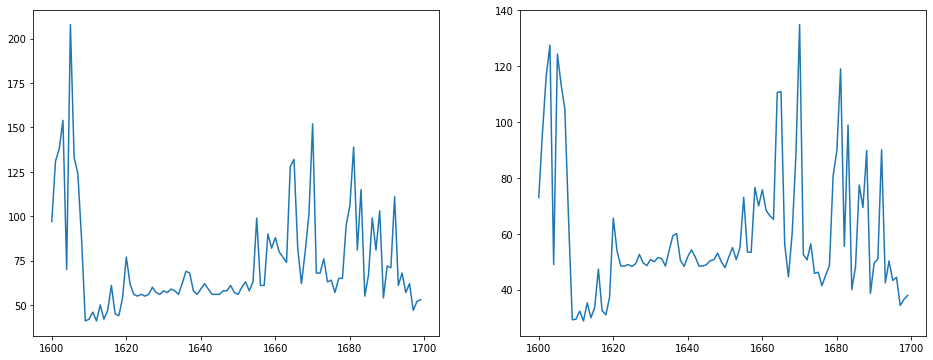

   session             name    value
0      215  random_episodes   10.000
1      215            gamma    0.950
2      215              tau    0.005
3      215               lr    0.010
4      215      hidden_size  256.000
5      215       batch_size   64.000
6      215   target_entropy   -2.000


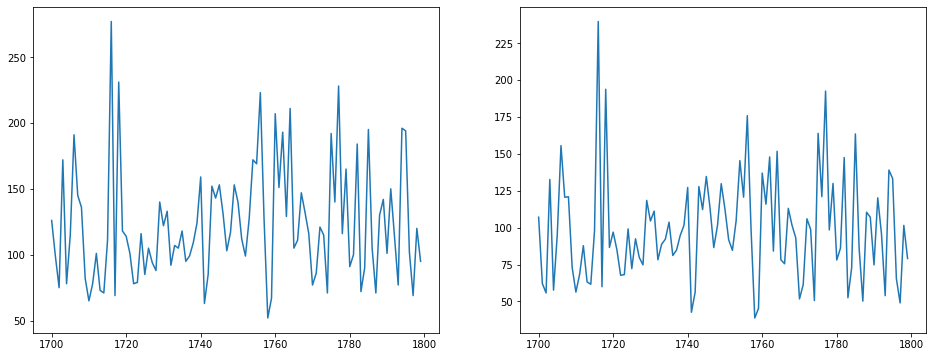

   session             name    value
0      216  random_episodes   10.000
1      216            gamma    0.950
2      216              tau    0.005
3      216               lr    0.010
4      216      hidden_size  128.000
5      216       batch_size   64.000
6      216   target_entropy   -1.000


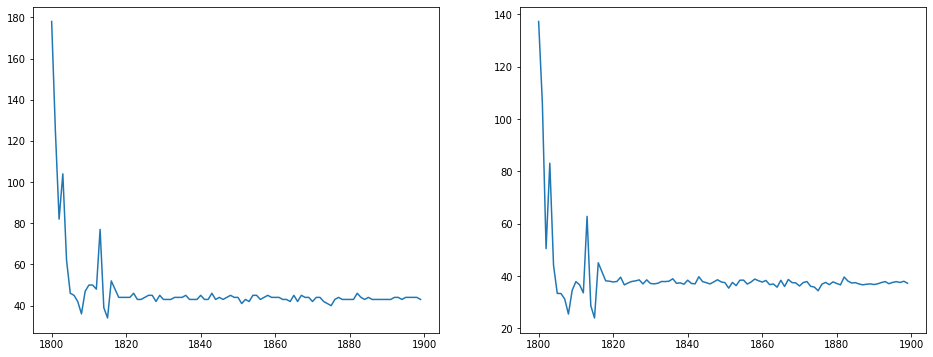

   session             name    value
0      217  random_episodes    5.000
1      217            gamma    0.990
2      217              tau    0.001
3      217               lr    0.010
4      217      hidden_size   64.000
5      217       batch_size  128.000
6      217   target_entropy   -6.000


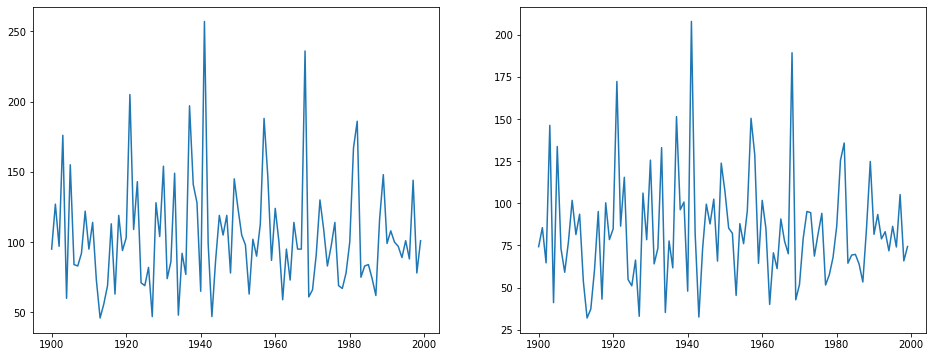

   session             name     value
0      218  random_episodes   10.0000
1      218            gamma    0.9500
2      218              tau    0.0050
3      218               lr    0.0001
4      218      hidden_size  128.0000
5      218       batch_size  128.0000
6      218   target_entropy   -2.0000


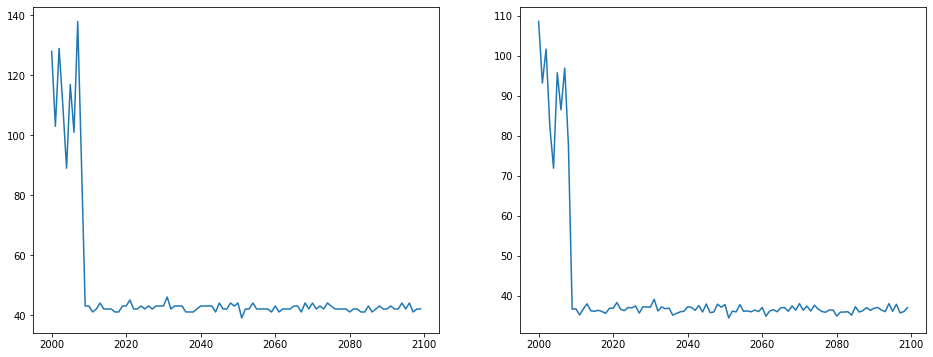

   session             name    value
0      219  random_episodes   10.000
1      219            gamma    0.990
2      219              tau    0.005
3      219               lr    0.010
4      219      hidden_size  256.000
5      219       batch_size  128.000
6      219   target_entropy   -6.000


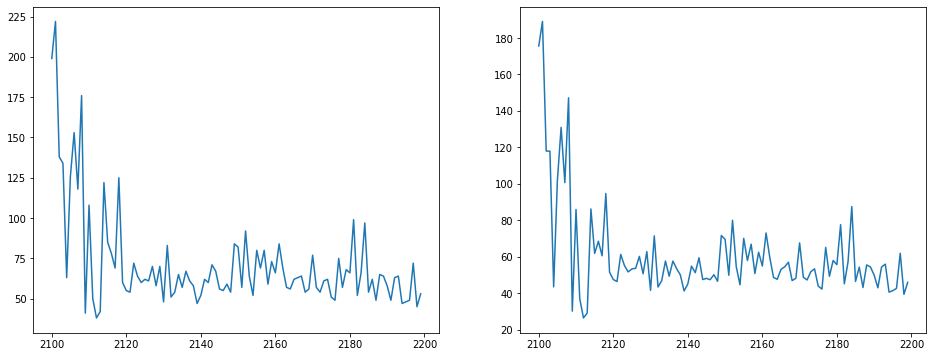

   session             name   value
0      220  random_episodes   10.00
1      220            gamma    0.99
2      220              tau    0.01
3      220               lr    0.01
4      220      hidden_size   64.00
5      220       batch_size  128.00
6      220   target_entropy   -2.00


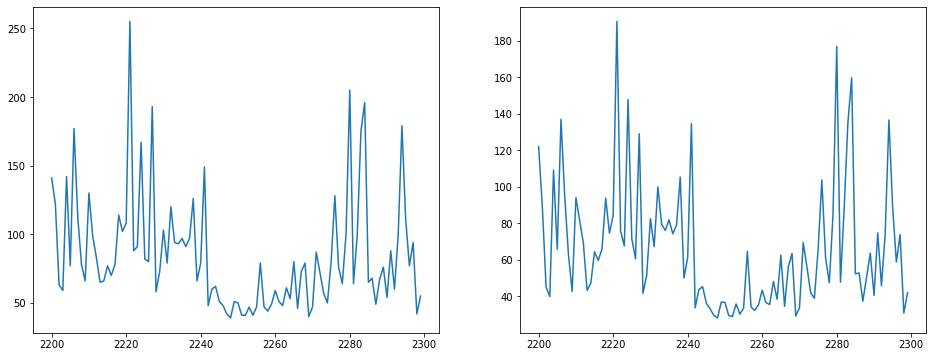

   session             name    value
0      221  random_episodes   10.000
1      221            gamma    0.990
2      221              tau    0.001
3      221               lr    0.001
4      221      hidden_size  128.000
5      221       batch_size  128.000
6      221   target_entropy   -2.000


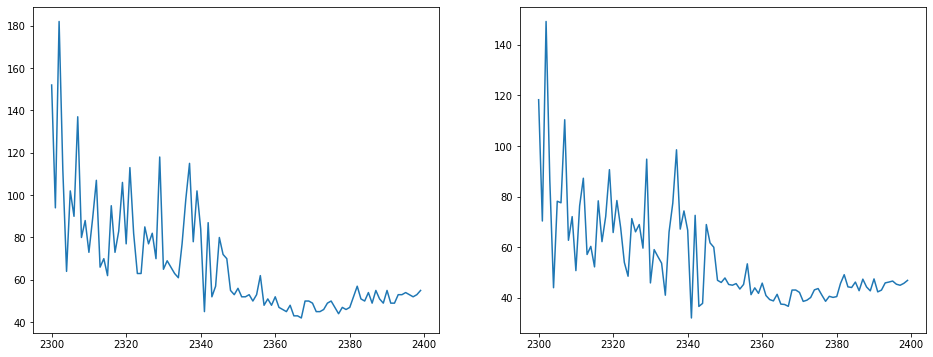

   session             name    value
0      222  random_episodes    5.000
1      222            gamma    0.950
2      222              tau    0.001
3      222               lr    0.010
4      222      hidden_size  128.000
5      222       batch_size  128.000
6      222   target_entropy   -1.000


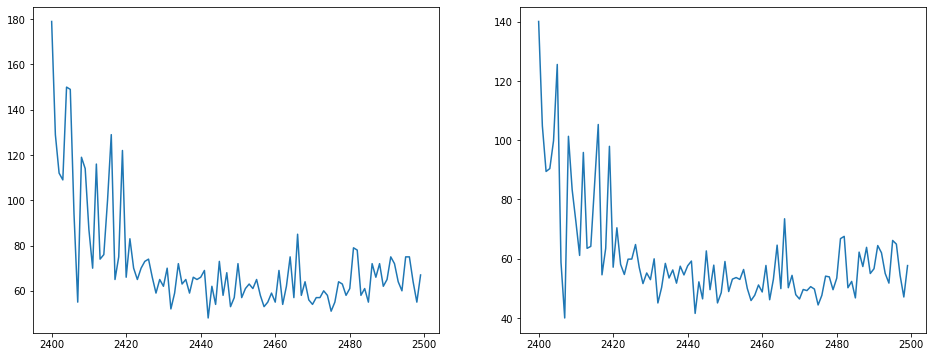

   session             name    value
0      223  random_episodes   10.000
1      223            gamma    0.990
2      223              tau    0.005
3      223               lr    0.010
4      223      hidden_size  128.000
5      223       batch_size  128.000
6      223   target_entropy   -1.000


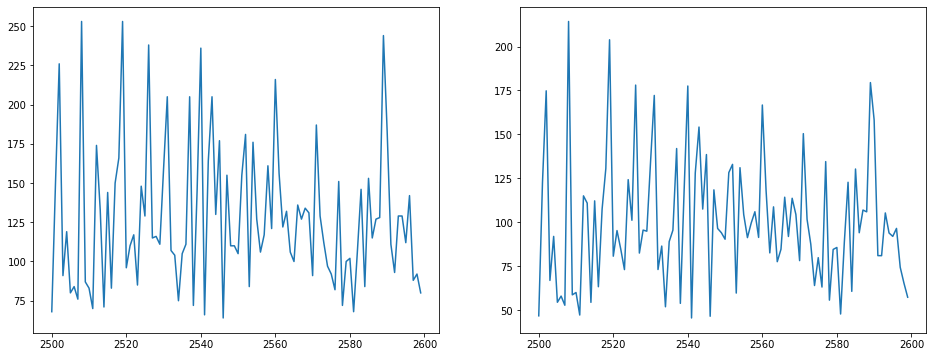

   session             name     value
0      224  random_episodes    5.0000
1      224            gamma    0.9900
2      224              tau    0.0050
3      224               lr    0.0001
4      224      hidden_size  128.0000
5      224       batch_size   64.0000
6      224   target_entropy   -2.0000


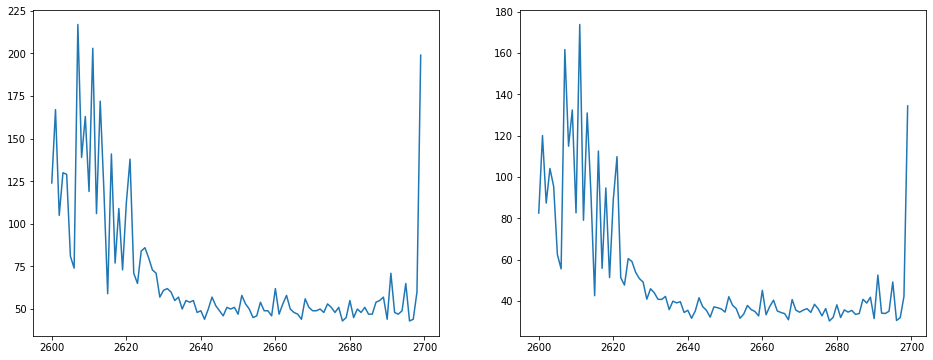

   session             name   value
0      225  random_episodes   5.000
1      225            gamma   0.950
2      225              tau   0.005
3      225               lr   0.001
4      225      hidden_size  64.000
5      225       batch_size  64.000
6      225   target_entropy  -2.000


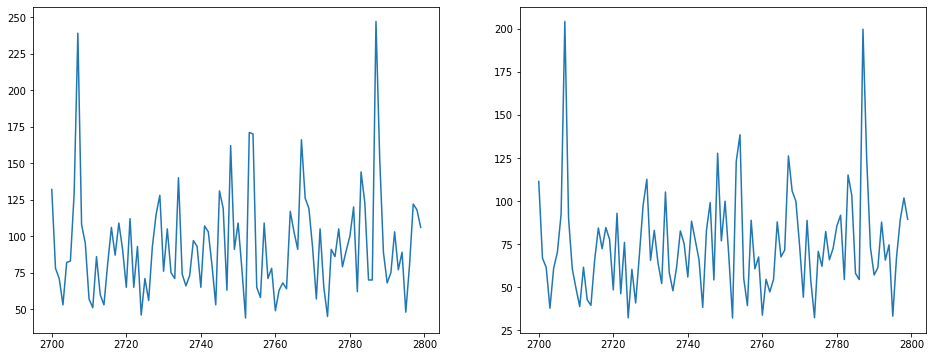

   session             name     value
0      226  random_episodes    5.0000
1      226            gamma    0.9900
2      226              tau    0.0100
3      226               lr    0.0001
4      226      hidden_size   64.0000
5      226       batch_size  128.0000
6      226   target_entropy   -1.0000


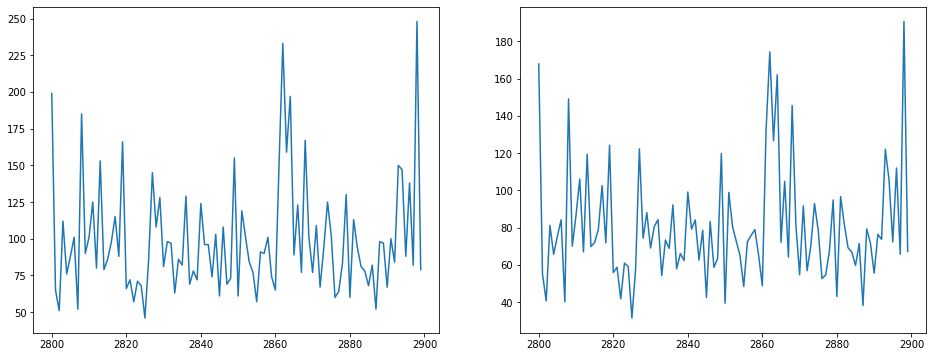

   session             name     value
0      227  random_episodes   10.0000
1      227            gamma    0.9500
2      227              tau    0.0100
3      227               lr    0.0001
4      227      hidden_size   64.0000
5      227       batch_size  128.0000
6      227   target_entropy   -2.0000


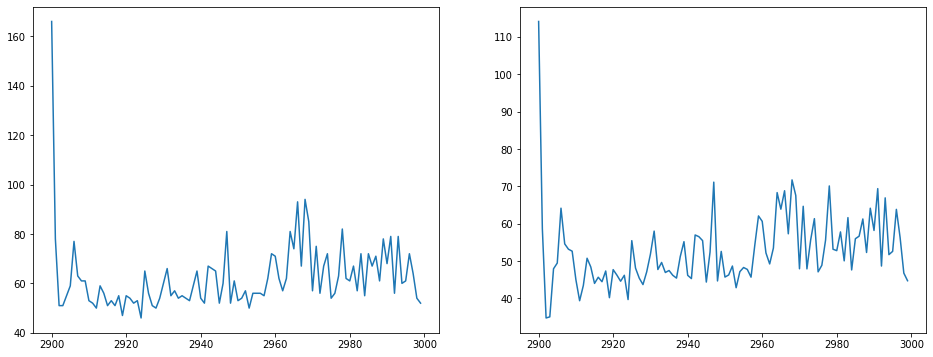

   session             name   value
0      228  random_episodes    5.00
1      228            gamma    0.99
2      228              tau    0.01
3      228               lr    0.01
4      228      hidden_size  128.00
5      228       batch_size  128.00
6      228   target_entropy   -1.00


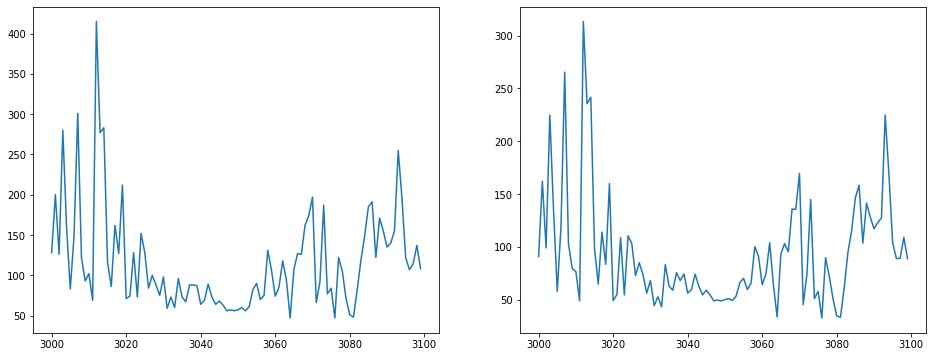

   session             name    value
0      229  random_episodes   10.000
1      229            gamma    0.950
2      229              tau    0.005
3      229               lr    0.001
4      229      hidden_size  128.000
5      229       batch_size   64.000
6      229   target_entropy   -2.000


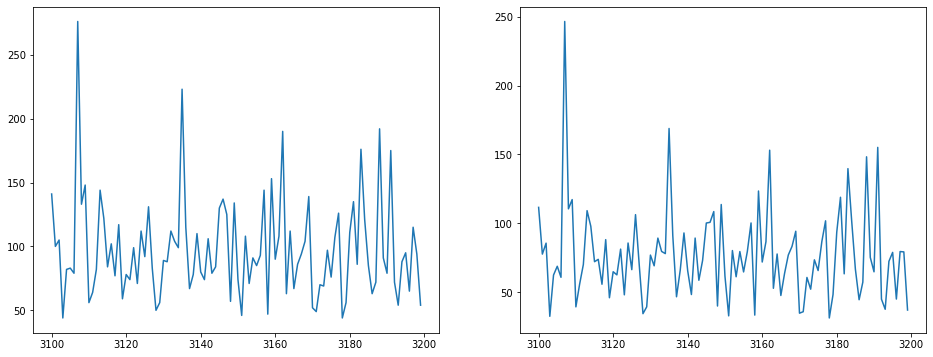

   session             name     value
0      230  random_episodes   10.0000
1      230            gamma    0.9500
2      230              tau    0.0010
3      230               lr    0.0001
4      230      hidden_size   64.0000
5      230       batch_size  128.0000
6      230   target_entropy   -6.0000


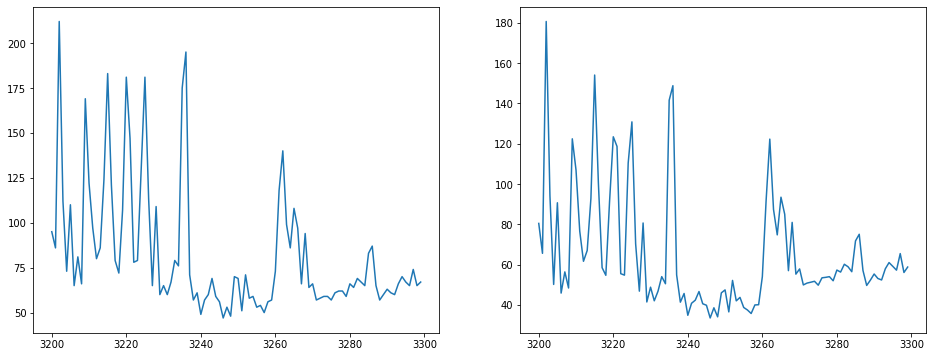

   session             name    value
0      231  random_episodes    5.000
1      231            gamma    0.950
2      231              tau    0.010
3      231               lr    0.001
4      231      hidden_size  128.000
5      231       batch_size   64.000
6      231   target_entropy   -1.000


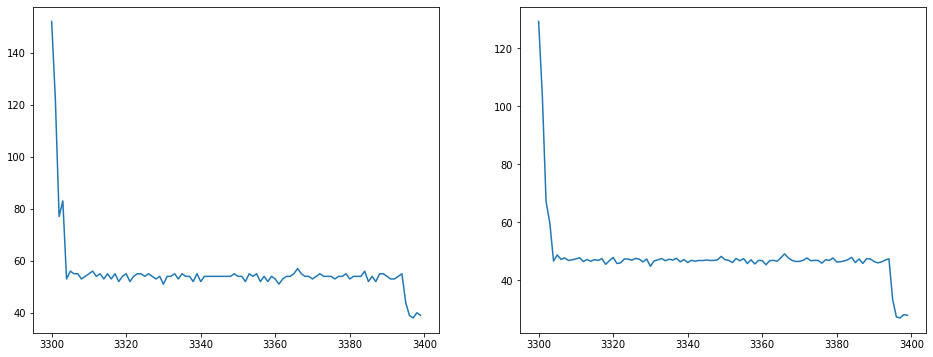

   session             name   value
0      232  random_episodes    5.00
1      232            gamma    0.99
2      232              tau    0.01
3      232               lr    0.01
4      232      hidden_size  256.00
5      232       batch_size   64.00
6      232   target_entropy   -1.00


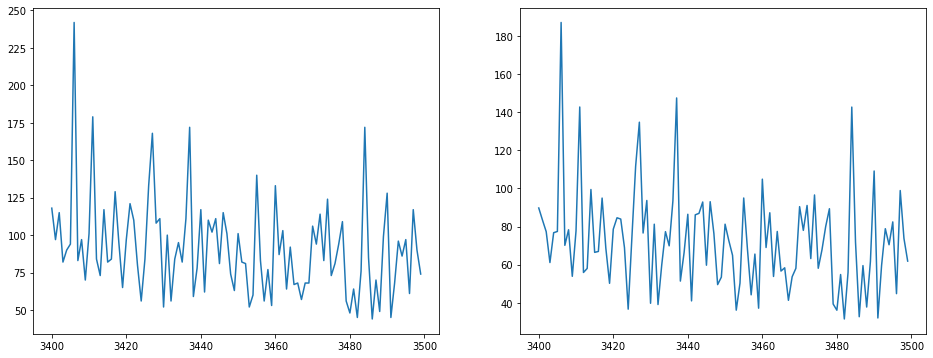

   session             name     value
0      233  random_episodes    5.0000
1      233            gamma    0.9900
2      233              tau    0.0010
3      233               lr    0.0001
4      233      hidden_size  128.0000
5      233       batch_size  128.0000
6      233   target_entropy   -6.0000


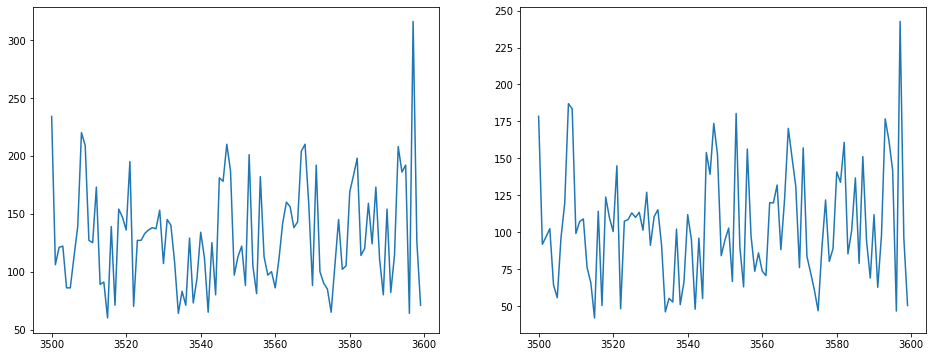

   session             name     value
0      234  random_episodes    5.0000
1      234            gamma    0.9500
2      234              tau    0.0010
3      234               lr    0.0001
4      234      hidden_size  256.0000
5      234       batch_size   64.0000
6      234   target_entropy   -6.0000


In [25]:
for i in set(succ["id"]):
    steps = succ[succ["id"] == i]["steps"]
    reward = succ[succ["id"] == i]["reward"]
    params = get_params(i, conn)
    plt.figure(1, (16, 6))
    plt.subplot(1, 2, 1)
    plt.plot(steps)
    plt.subplot(1, 2, 2)
    plt.plot(reward)
    plt.show()
    print(params)
